In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./DataSet/Customer-Churn-Prediction.csv') #import data set 

In [3]:
df1 = df.copy() 
df2 = df.copy()
df3 = df.copy()

In [4]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
1869/(5174+1869)  

0.2653698707936959

<AxesSubplot:xlabel='Churn', ylabel='count'>

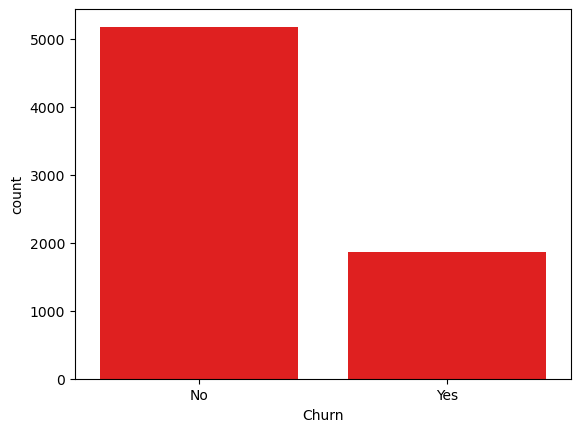

In [9]:
sns.countplot(df['Churn'],color='red')

In [10]:
df = df.dropna()

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(7043, 21)

In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


<AxesSubplot:>

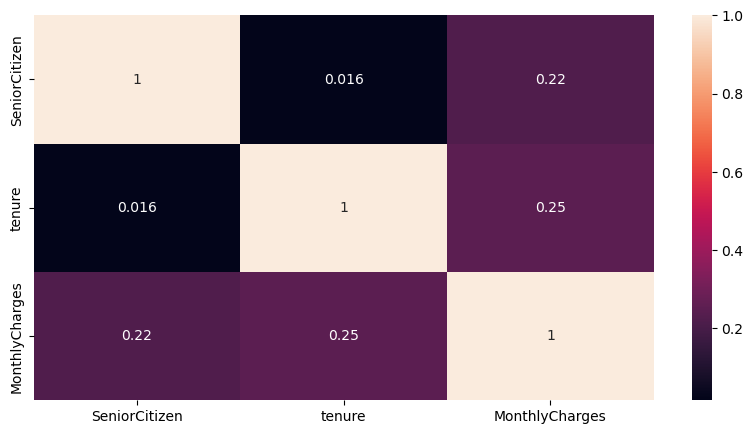

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , annot=True)

# Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='count', ylabel='gender'>

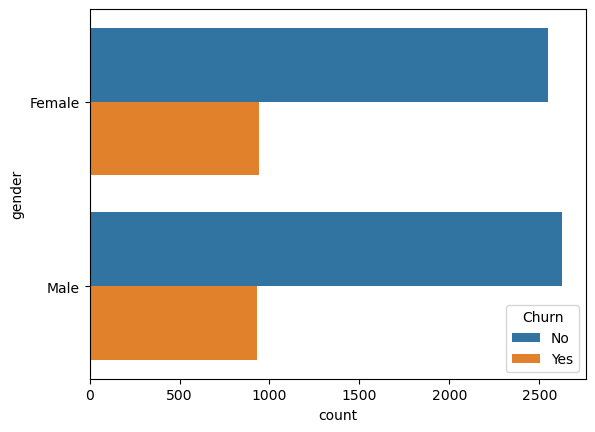

In [15]:
sns.countplot( y = 'gender', hue='Churn', data=df )

<AxesSubplot:xlabel='gender', ylabel='count'>

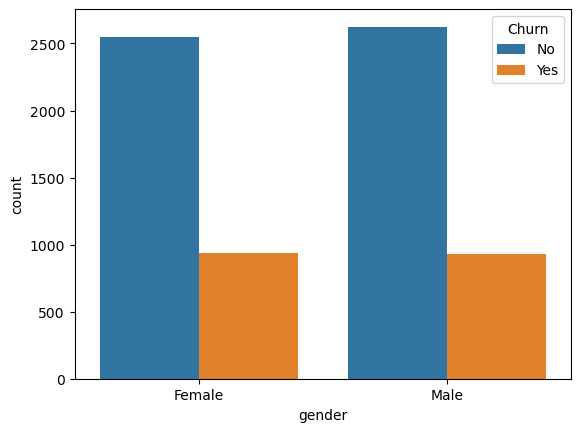

In [16]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

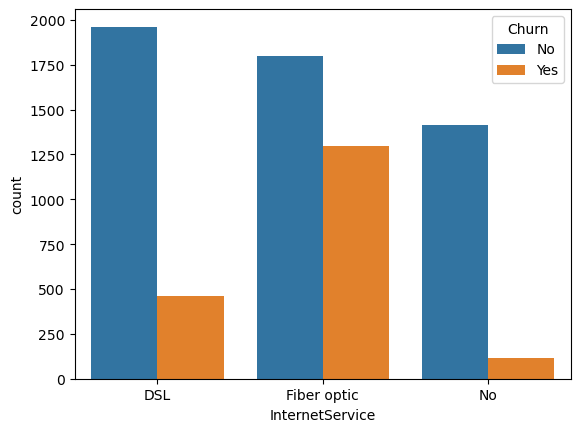

In [17]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

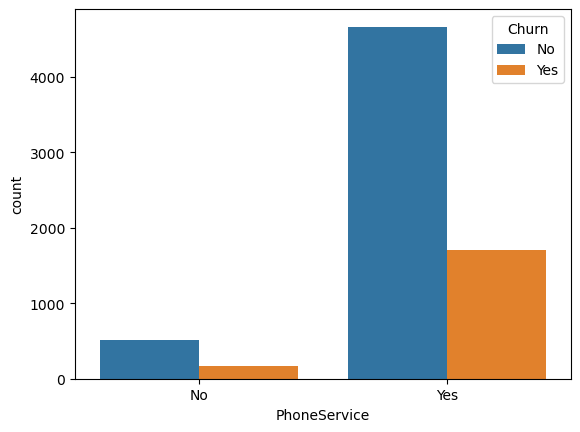

In [18]:
sns.countplot(x = 'PhoneService', hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

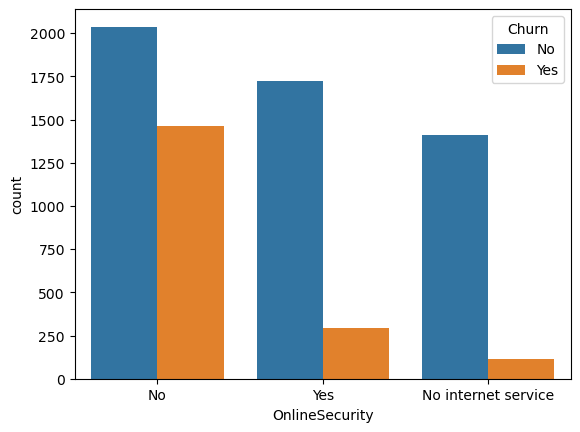

In [19]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [20]:
df['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

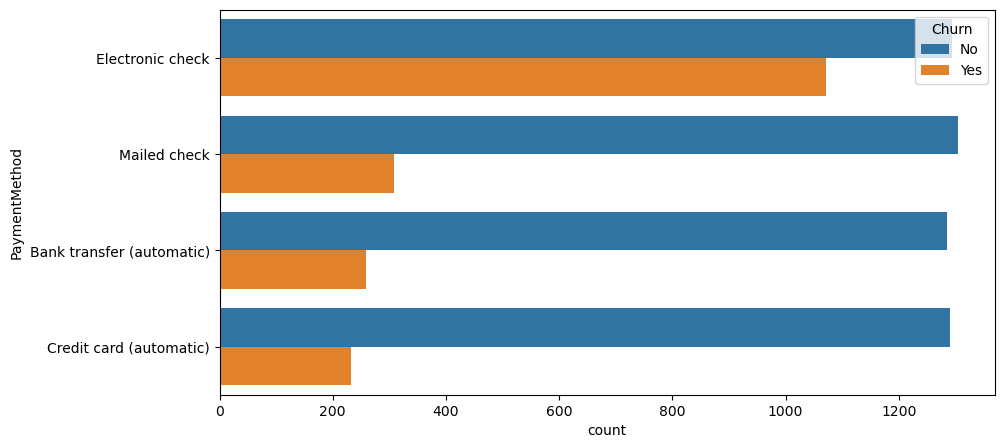

In [21]:
plt.subplots(figsize=(10,5))
sns.countplot(y='PaymentMethod',hue='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

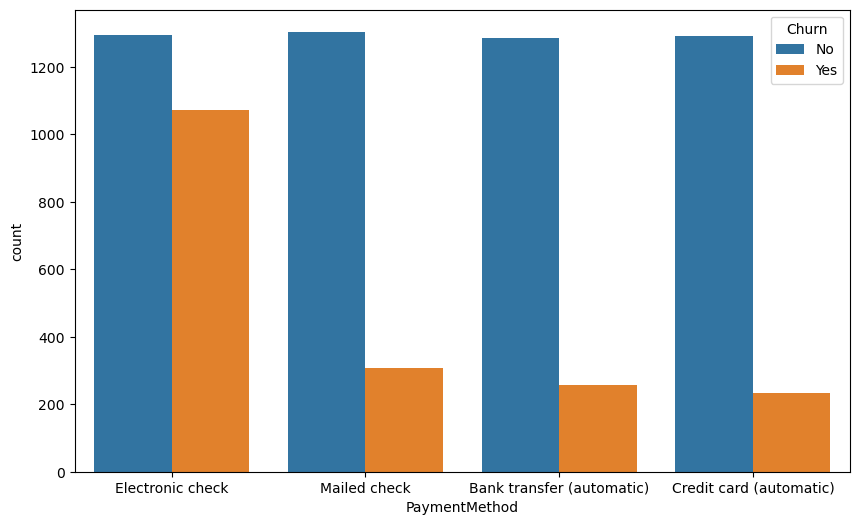

In [22]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod', hue='Churn', data=df) 

# Preprocess the dataset

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [25]:
df.shape

(7043, 20)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encode the data set

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# seperate x, y

In [32]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn'] #  churn is class

In [33]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [34]:
x.shape

(7043, 19)

In [35]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [36]:
y.shape

(7043,)

# Imbalanced Data Handling 

In [37]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [38]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

In [39]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [40]:
!pip install imblearn

In [41]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [42]:
from imblearn.combine import SMOTETomek

In [43]:
sm = SMOTETomek(random_state=100)

In [44]:
y.value_counts() # before sampling

0    5174
1    1869
Name: Churn, dtype: int64

In [45]:
X,Y = sm.fit_resample(x,y)

In [46]:
X.shape

(9648, 19)

In [47]:
Y.shape

(9648,)

In [48]:
Y.value_counts()

0    4824
1    4824
Name: Churn, dtype: int64

In [49]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
1,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
2,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
3,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
4,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550


In [50]:
X.shape

(9648, 19)

# Near Miss for Under_Sampling

In [51]:
from imblearn.under_sampling import NearMiss

In [52]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [53]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [54]:
new_x.shape

(3738, 19)

In [55]:
new_y.shape

(3738,)

In [56]:
3738/2

1869.0

In [57]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int32

In [58]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [59]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
over = RandomOverSampler(random_state=100)

In [63]:
x_new , y_new = over.fit_resample(x,y)

In [64]:
x_new.shape

(10348, 19)

In [65]:
y_new.shape

(10348,)

In [66]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Cross Validation

# Hold Out Cross Validation

In [67]:
from sklearn.model_selection import train_test_split 

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [69]:
xtrain.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,2728
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,3480
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,2767
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,2870
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,1750


In [70]:
train , test = train_test_split(df, train_size=.80, random_state=42) 

In [71]:
train.to_csv('./DataSet/total 80.csv')

In [72]:
df6 = pd.read_csv('./DataSet/total 80.csv')
df6.shape

(5634, 21)

In [73]:
rows, col = df.shape
rows2, cols2 = df6.shape

In [74]:
rows

7043

In [75]:
rows2

5634

In [76]:
col

20

In [77]:
cols2

21

In [78]:
7043*.80

5634.400000000001

In [79]:
train,  test = train_test_split(df, train_size=.75, random_state=42) 

In [80]:
train.to_csv('./DataSet/train_data.csv')

In [81]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
9428,0,0,0,0,54,1,2,1,0,0,0,2,2,2,0,1,2,100.10,4523
4593,0,0,0,0,11,1,0,2,1,1,1,1,1,1,0,0,0,20.30,2108
5379,0,0,1,0,56,1,2,1,2,0,0,0,2,2,1,1,2,98.00,4412
8918,0,1,0,0,2,1,0,1,0,0,0,0,0,2,0,1,2,79.60,1551
6448,1,0,0,0,58,1,2,1,0,0,2,2,2,2,1,1,2,104.65,5051


In [82]:
xtest.shape

(2587, 19)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
Clf = DecisionTreeClassifier() 

In [85]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [86]:
Clf.score(xtest,ytest)*100 # after sampling

86.54812524159257

# Without sampling

In [87]:
x.shape

(7043, 19)

In [88]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [89]:
Clf.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [90]:
Clf.score(xtest1,ytest1)*100 # imbalanced old data

73.25383304940375

# XGBoost Classifier (Extreme Gradient Boosting)

In [91]:
!pip install xgboost

In [92]:
import xgboost 
from xgboost import XGBClassifier

In [93]:
xgb = XGBClassifier()

In [94]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [95]:
xgb.score(xtest,ytest)*100 # After sampling

86.04561267877851

# Before sampling

In [96]:
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [97]:
xgb.score(xtest1, ytest1)*100

79.10278250993753

# Ada Boost (Adaptive Boosting)

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [99]:
ada = AdaBoostClassifier()

In [100]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [101]:
ada.score(xtest,ytest)*100

77.15500579822188

# Before sampling

In [102]:
ada.fit(xtrain1, ytrain1)

AdaBoostClassifier()

In [103]:
ada.score(xtest1, ytest1)*100

79.7274275979557

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

In [106]:
rf.fit(xtrain, ytrain) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [107]:
rf.score(xtest,ytest)*100

63.100976702442566

## Before sampling

In [108]:
rf.fit(xtrain1, ytrain1) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [109]:
rf.score(xtest1,ytest1)*100

23.864559813955253

# Cross Validation

# K Fold Cross Validation

In [110]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [111]:
kfold = KFold(n_splits=4, shuffle=True) #each fold contain 25% data

In [112]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

In [113]:
result1 = cross_val_score(rf, x_new, y_new, cv=kfold) 

In [114]:
result1*100

array([62.1530011 , 65.86999809, 64.1063007 , 62.13470871])

In [115]:
result*100

array([85.77502899, 85.07924237, 85.77502899, 84.19018168])

In [116]:
result.mean()

0.8520487050637804

In [117]:
result.max()

0.8577502899110939

In [118]:
result.min()

0.8419018167761886

# Stratified k fold cross Validation

In [119]:
from sklearn.model_selection import StratifiedKFold

In [120]:
st = StratifiedKFold(n_splits=4)

In [121]:
score2 = cross_val_score(xgb, x_new, y_new,cv=st)

In [122]:
score2*100

array([84.80865868, 85.62040974, 85.89099343, 88.67413993])

In [123]:
score2.max()*100

88.67413993042133

In [124]:
score2.min()*100

84.80865867800541

In [125]:
score2.mean()*100

86.24855044453035

# Leave One Out Cross Validation

In [126]:
from sklearn.model_selection import LeaveOneOut

In [127]:
le = LeaveOneOut()

In [ ]:
result3 = cross_val_score(ada,x,y,cv=le)

In [ ]:
result3*100

In [ ]:
result3.mean()*100